# Decision Trees and Random Forests in Python

This is the code for using **Decison tree** and then **Random forest** to check how both models perform on the Kyphosos data set.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

## Performing EDA and checking null values, etc

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<AxesSubplot:>

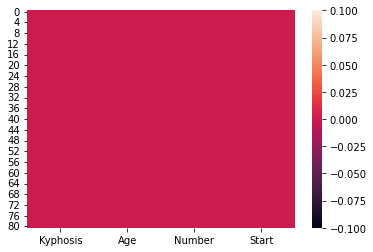

In [5]:
sns.heatmap(df.isnull())

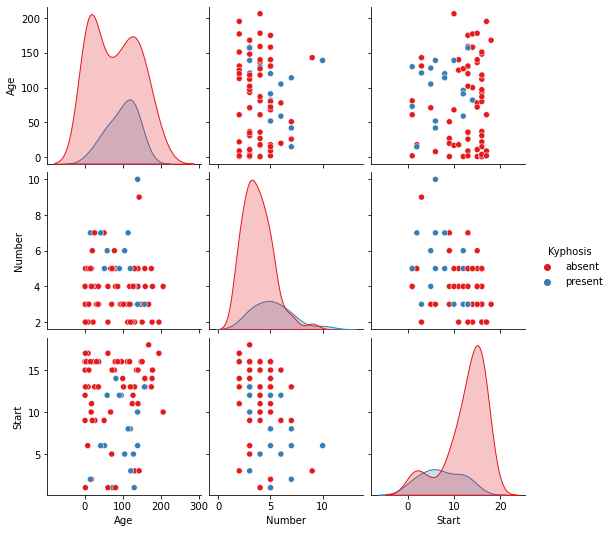

In [11]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

In [14]:
# Let's convert Kyphosis columns to int

kyphosis_data = pd.get_dummies(df['Kyphosis'], drop_first=True)

In [15]:
kyphosis_data

present
0         0
1         0
2         1
3         0
4         0
..      ...
76        1
77        0
78        0
79        1
80        0

[81 rows x 1 columns]

In [17]:
df = pd.concat((df, kyphosis_data), axis=1)

In [18]:
df.head()

Kyphosis  Age  Number  Start  present
0   absent   71       3      5        0
1   absent  158       3     14        0
2  present  128       4      5        1
3   absent    2       5      1        0
4   absent    1       4     15        0

In [19]:
df.drop('Kyphosis', axis=1, inplace=True)

In [20]:
df.rename(columns={'present': 'Kyphosis'}, inplace=True)

In [21]:
df.head()

Age  Number  Start  Kyphosis
0   71       3      5         0
1  158       3     14         0
2  128       4      5         1
3    2       5      1         0
4    1       4     15         0

# Building the **Decision Tree** model here

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
decision_tree = DecisionTreeClassifier()

In [26]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = decision_tree.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [29]:
confusion_matrix(y_test, y_pred)

array([[12,  5],
       [ 6,  2]], dtype=int64)

# Building RANDOM FOREST model here

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_forest = RandomForestClassifier()

In [33]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_random = random_forest.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [36]:
confusion_matrix(y_test, y_pred_random)

array([[17,  0],
       [ 6,  2]], dtype=int64)

# Conclusion

We can clearly see that Random forest performed much better here.
We got better accuracy and Precision here. 
Confusion matrix also reads better

Over all idea is to convey the fact that Random Forest (ensemble of many Decision Trees) performs better by bootstrapping samples from the training data set.

# Good Work !